[View in Colaboratory](https://colab.research.google.com/github/paulamos/MLcourse/blob/master/MachineLearningLab02.ipynb)

In [0]:
import numpy as np 

In [0]:
def activation_function(x):
  return 1 / (1 + np.exp(-x))

In [5]:
np.random.rand(5,2)

array([[0.83487648, 0.55308265],
       [0.01882944, 0.86165271],
       [0.15216245, 0.7843737 ],
       [0.62687451, 0.56717848],
       [0.10515579, 0.45417579]])

In [0]:
# testing - integer inputs
#input_values = np.random.rand(4)
input_values = np.random.randint(10, size=(4,1))
output_values = (input_values>5)*1
input_values = np.append(input_values,-1)

In [0]:
input_values = input_values.reshape((5,1))

In [45]:
print(input_values)
print(output_values)

[ 9  0  4  7 -1]
[[1]
 [0]
 [0]
 [1]]


In [0]:
def initialize_nn_weights(input_values,layers_shape):
  weights = {}
  weights["w0"] = np.random.rand(len(input_values),layers_shape[0])
  for i in range(1,len(layers_shape)):
    weights["w"+str(i)]=np.random.randn(layers_shape[i-1],layers_shape[i])
  return weights

In [0]:
def initialize_nn_weights_int(input_values,layers_shape):
  weights = {}
  weights["w0"] = np.random.rand(len(input_values),layers_shape[0])
  for i in range(1,len(layers_shape)):
    weights["w"+str(i)]=np.random.randn(layers_shape[i-1],layers_shape[i])
  return weights

In [0]:
params = initialize_nn_weights(input_values,layers_shape=[2,1])

In [36]:
params

{'w0': array([[0.11764792, 0.23218882],
        [0.42313867, 0.90129667],
        [0.78569453, 0.17744621],
        [0.72630584, 0.02423173],
        [0.62580217, 0.71492707]]), 'w1': array([[ 1.977564  ],
        [-0.24341915]])}

In [52]:
input_values

array([[ 9],
       [ 0],
       [ 4],
       [ 7],
       [-1]])

In [53]:
params['w0']

array([[0.11764792, 0.23218882],
       [0.42313867, 0.90129667],
       [0.78569453, 0.17744621],
       [0.72630584, 0.02423173],
       [0.62580217, 0.71492707]])

In [54]:
params['w0']*input_values

array([[ 1.05883128,  2.08969937],
       [ 0.        ,  0.        ],
       [ 3.14277811,  0.70978482],
       [ 5.08414088,  0.16962211],
       [-0.62580217, -0.71492707]])

In [59]:
np.sum(params['w0']*input_values, axis=0)

array([8.65994809, 2.25417924])

In [0]:
layer1_values = activation_function(np.sum(params['w0']*input_values, axis=0))

In [0]:
layer1_values = layer1_values.reshape((2,1))

In [66]:
params['w1']

array([[ 1.977564  ],
       [-0.24341915]])

In [67]:
params['w1']*layer1_values

array([[ 1.97722116,  1.78971602],
       [-0.24337695, -0.22029687]])

### Sample file

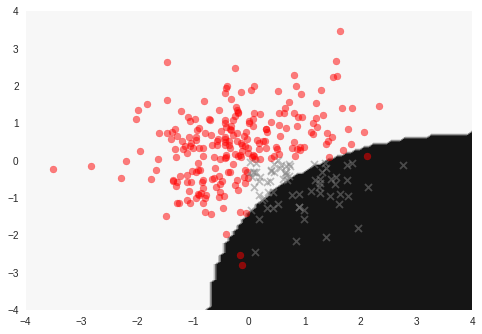

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sigma(x):
    return 1 / (1 + math.exp( -x ))

def getFakeNeuralNetOutput(x, y):
    firstLayerNeuron1 = sigma(x + 0.01 * y)
    firstLayerNeuron2 = sigma(0.01 * x + y)
    outputLayer1 = sigma( firstLayerNeuron1 -  firstLayerNeuron2 + 0.3)
    outputLayer2 = sigma(-  firstLayerNeuron1 + firstLayerNeuron2 - 0.3)
    return [outputLayer1, outputLayer2]

def getDecisionOfFakeNeuralNet(x, y):
    output = getFakeNeuralNetOutput(x, y)
    return 1 if output[1] > output[0] else 0

def getSamples(N):
    samples = []
    for i in range(N):
        x = np.random.normal()
        y = np.random.normal()
        which = 1 if x > 0 and y < 0 else 0
        samples.append( (x, y, which) )
    return samples

def plotDecisionDomain(listOfX, listOfY, decisionFunction):
    arrayOfX, arrayOfY = np.meshgrid(listOfX, listOfY)
    plt.contourf(arrayOfX, arrayOfY, [[decisionFunction(x, y) for y in listOfY] for x in listOfX])

def plotSamples(samples):
    markers = ['o', 'x']
    colors = ['red', 'gray']
    for sample in samples:
        plt.scatter(sample[0], sample[1],
                    marker = markers[sample[2]], color = colors[sample[2]],
                    alpha = 0.5)

def getGrid(view):
    return [view[0] + (view[1] - view[0]) * i / (view[2] - 1) for i in range(view[2])]

numberOfSamples = 300
samples = getSamples(numberOfSamples)

viewX = [-4, 4, 101]
viewY = [-4, 4, 101]

plotDecisionDomain(getGrid(viewX), getGrid(viewY), getDecisionOfFakeNeuralNet)
plotSamples(samples)
plt.show()


In [4]:
samples

[(0.8651213366177577, 0.3110722159094428, 0),
 (-0.5627577585311592, 0.5131366889033703, 0),
 (0.18592371969001006, -0.9174913645873136, 1),
 (0.780603888077733, 0.32887597624172527, 0),
 (-0.5187639636324084, 0.025181748802140722, 0),
 (0.8077129327565202, 1.2721088453462712, 0),
 (-0.8314657243176642, -1.1482643191426658, 0),
 (0.09433994239440412, 0.12117300785698645, 0),
 (0.5452393427400065, 0.952516057777151, 0),
 (-0.3156068380017167, 0.9282535188526528, 0),
 (1.2901442541688593, 1.8943182165091317, 0),
 (0.8698783976893496, 0.9160269466793896, 0),
 (1.2191485334701366, 0.8935822417791404, 0),
 (-0.813002101025142, 1.577165145010075, 0),
 (0.19654098089274893, -0.4369056593925683, 1),
 (-0.7740184087904917, -0.939313121602096, 0),
 (-0.9412885792586911, -1.012398015765883, 0),
 (-0.13753555198764073, 0.4563481495439016, 0),
 (-0.2829058484988546, 0.6775827357694981, 0),
 (1.4037608987577814, 0.7306487943234209, 0),
 (-0.574087283098976, 0.4065974603412104, 0),
 (1.37338204329481

### Deep NN

In [0]:
import numpy as np

In [0]:
def initialize_weights(layer_dims):
  parameters = {}
  L = len(layer_dims)            # number of layers in the network
  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
  return parameters


def sigmoid(x):
  return 1 / (1 + np.exp(-x))  


def linear_activation_forward(X, W):
  Z = np.dot(W, X)
  A = sigmoid(Z)
  return A
  
  
def NN_model_forward(X, parameters):
  A = X
  L = len(parameters)                # number of layers in the neural network    
  for l in range(1, L-1):
    A = linear_activation_forward(A, parameters['W' + str(l)])            
  return A  

In [0]:
X = [0.2, 0.4, 0.8, 0.1]
Y = [0, 0, 1, 1]

In [0]:
layers_dims = [4, 4, 2, 1] # layer_dims = [input, hidden_layers, output]
weights = initialize_weights(layers_dims)
output = NN_model_forward(X, weights)

In [19]:
weights

{'W1': array([[ 0.00386489,  0.00053508, -0.00779781,  0.00701578],
        [-0.00087372, -0.0114256 , -0.00938531,  0.00108861],
        [-0.02668529, -0.00517235,  0.0053161 ,  0.00270938],
        [ 0.0164465 , -0.01028729, -0.01499277,  0.00406867]]),
 'W2': array([[-0.01382752, -0.01412798,  0.01223027, -0.00777453],
        [ 0.01315424, -0.01456063,  0.00135374,  0.00732651]]),
 'W3': array([[-0.00682105, -0.01564568]])}

In [22]:
output

array([0.50215438, 0.50369197, 0.50223031, 0.49798179])